# Python "científico": biblioteca _pandas_

![](images_scipython/sci_python_pandas.png)

_web site_: (`pandas.pydata.org`)

![](images_scipython/pandas_web.png)

## `Series`

> `Series` is a one-dimensional **labeled** array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the **index**. 

In [44]:
import pandas as pd

Uma Série (_Series_) é um conjunto (ordenado) de valores, mas cada valor é associado a uma "etiqueta" (_label_).

Ao conjunto das etiquetas dá-se o nome de "**índice**".

Quando construímos uma Série, usando a função `Series()`, podemos indicar o índice.

In [45]:
s = pd.Series([1.4,2.2,3.2,6.5,12], index=['a', 'b', 'c', 'd', 'e'])
print s

a     1.4
b     2.2
c     3.2
d     6.5
e    12.0
dtype: float64


Se não indicarmos um índice, o conjunto dos inteiros sucessivos será o índice.

In [46]:
s = pd.Series([1.4,2.2,3.2,6.5,12])
print s

0     1.4
1     2.2
2     3.2
3     6.5
4    12.0
dtype: float64


As Séries podem ser construídas a partir de um dicionário, em que as chaves são o índice.

In [47]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(d)
print s

a    0
b    1
c    2
dtype: float64


Podemos, mesmo neste caso, indicar um índice. Caso o índice tenha elementos para além das chaves do dicionário, haverá **valores em falta**.

In [48]:
s = pd.Series(d, index=['b', 'c', 'd', 'a'])
print s

b     1
c     2
d   NaN
a     0
dtype: float64


O uso do marcador `NaN` para indicar **valores em falta** e a existência de muitas funções de análise que levam em conta valores em falta são uma característica muito poderosa do módulo `pandas`.

### Indexação e operações vetoriais

As Séries podem ser usadas como dicionários: **as etiquetas comportam-se como chaves** e são usadas para indexar uma Série. para obter um valor (e também para modificar um valor).

Tal como nos dicionários, o operador `in` **testa a existência de uma etiqueta**.

In [49]:
s = pd.Series(d, index=['b', 'c', 'd', 'a'])
print s

print '-----------'
print s['b']
print s.c # notação abreviada para labels "simples"

s['b'] = 0.5

print

print 'z' in s # teste de existência de um label
print 'd' in s

b     1
c     2
d   NaN
a     0
dtype: float64
-----------
1.0
2.0

False
True


Mas as Séries são muito mais poderosas: elas comportam-se como _arrays_ do módulo `numpy`. Podemos usar:

- indexação com inteiros
- _slices_
- **operações vetoriais**.

In [50]:
s = pd.Series({'a' : 0.5, 'b' : 1.0, 'c' : 3.0, 'e': 1.8}, 
              index=['b', 'c', 'd', 'e', 'a'])
print s
print '-----------'
print s[0]
print '-----------'
print s[:3]
print '-----------'
print s**2
print '-----------'
print s[s > 0.75]

b    1.0
c    3.0
d    NaN
e    1.8
a    0.5
dtype: float64
-----------
1.0
-----------
b     1
c     3
d   NaN
dtype: float64
-----------
b    1.00
c    9.00
d     NaN
e    3.24
a    0.25
dtype: float64
-----------
b    1.0
c    3.0
e    1.8
dtype: float64


Também muito poderoso é o facto de que, quando aplicamos operações vetoriais sobre Séries (por exemplo, na soma de duas séries), **os valores são "alinhados" pelos respetivos _labels_** antes da operação. Vejamos estas duas séries:

In [51]:
s1 = pd.Series({'a' : 0.5, 'b' : 1.0, 'c' : 3.0, 'e': 1.8}, 
              index=['b', 'c', 'd', 'e', 'a'])

s2 = s1[s1 > 0.75]
s2 = s2.reindex(['a', 'b', 'c', 'd', 'e', 'm', 'n'])
print s1
print '-----------'
print s2

b    1.0
c    3.0
d    NaN
e    1.8
a    0.5
dtype: float64
-----------
a    NaN
b    1.0
c    3.0
d    NaN
e    1.8
m    NaN
n    NaN
dtype: float64


A soma destas duas Séries resulta numa Série em que todas as etiquetas estão presentes (**união de conjuntos**).

As que só existirem numa das Séries ou as que, numa das Séries, têm o valor `NaN`, terão o valor `NaN` no resultado final.

In [52]:
print s1 + s2

a    NaN
b    2.0
c    6.0
d    NaN
e    3.6
m    NaN
n    NaN
dtype: float64


A função `.dropna()` permite eliminar os _valores em falta_.

In [53]:
s = pd.Series({'a' : 0.5, 'b' : 1.0, 'c' : 3.0, 'e': 1.8}, 
              index=['b', 'c', 'd', 'e', 'a', 'm', 'n'])
print s
print '-----------'
print s.dropna()

b    1.0
c    3.0
d    NaN
e    1.8
a    0.5
m    NaN
n    NaN
dtype: float64
-----------
b    1.0
c    3.0
e    1.8
a    0.5
dtype: float64


### Funções descritivas dos valores

As Séries têm algumas funções de estatística descritiva de grande utilidade.

Note-se que, em geral, **os valores em falta são ignorados nos cálculos**.

In [54]:
s = pd.Series({'a' : 0.5, 'b' : 1.0, 'c' : 3.0, 'e': 1.8}, 
              index=['b', 'c', 'd', 'e', 'a', 'm', 'n'])
print s
print '-----------------'
print 'Média:         {}'.format(s.mean())
print 'Desvio padrão: {:5.3f}'.format(s.std())

b    1.0
c    3.0
d    NaN
e    1.8
a    0.5
m    NaN
n    NaN
dtype: float64
-----------------
Média:         1.575
Desvio padrão: 1.090


In [55]:
print s.describe()

count    4.000000
mean     1.575000
std      1.090489
min      0.500000
25%      0.875000
50%      1.400000
75%      2.100000
max      3.000000
dtype: float64


In [56]:
print s.cumsum()

b    1.0
c    4.0
d    NaN
e    5.8
a    6.3
m    NaN
n    NaN
dtype: float64


## `DataFrame`

> `DataFrame` is a **2-dimensional labeled data structure** with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a **dict of Series objects**. It is generally the most commonly used pandas object.

Uma _DataFrame_ é um quadro bidimensional, em que cada coluna se comporta como uma Série, mas em que existe um índice comum a todas as colunas.

Para ilustar o uso de uma `DataFrame`, vamos ler e processar a informação da UniProt sobre a levedura _S. cerevisiae_.

A `DataFrame` terá as colunas "**AC**", "**Reviewed**", "**num aa**" e "**sequence**"

In [57]:
def read_prot_info(infile):
    with open(infile) as big:
        tudo = big.read()
    allprots = tudo.split('//\n')
    allprots.pop()
    return allprots

allprots = read_prot_info('uniprot_proteome_S_cerevisiae.txt')
print 'total de proteínas:', len(allprots)

total de proteínas: 6721


In [58]:
def extract_prot_info(p):
    """Devolve o par (AC, seq)."""

    # extract AC
    linhas = p.split('\n')
    partes = linhas[1].split()
    ac = partes[1][0:-1]
    
    # extract rev and naa
    partes = linhas[0].split()
    reviewed = partes[2][0:-1]
    naa = int(partes[3])
    
    # extract sequence
    for i, line in enumerate(linhas):
        if line.startswith('SQ   SEQUENCE'):
            # found! Now join the remaining lines
            s = ''.join(linhas[i+1:]) 
            # s is a string, but still contains whitespace
            # split and join to remove whitespace
            s = s.split()
            seq = ''.join(s)
            break
    return {'AC':ac, 'num aa':naa, 'Reviewed': reviewed, 'sequence':seq}

# Apply to all proteins. We end up with a list of dicts.
prots = [extract_prot_info(p) for p in allprots]

#test with P38903
#print prots[0]

Podemos construir uma `DataFrame` a partir de uma lista de dicionários. As **chaves dos dicionários serão as colunas**.

In [59]:
prots = pd.DataFrame(prots)
prots

,AC,Reviewed,num aa,sequence
0,P38903,Reviewed,757,MMRGFKQRLIKKTTGSSSSSSSKKKDKEKEKEKSSTTSSTSKKPAS...
1,P31383,Reviewed,635,MSGARSTTAGAVPSAATTSTTSTTSNSKDSDSNESLYPLALLMDEL...
2,Q00362,Reviewed,526,MAQNNFDFKFSQCFGDKADIVVTEADLITAVEFDYTGNYLATGDKG...
3,P47177,Reviewed,404,MYFLNQLIFQDVSVMSVDKREDMSRSFQKCLNLRYPIIQAPMAGVT...
4,P47096,Reviewed,177,MFNTTPINIDKWLKENEGLLKPPVNNYCLHKGGFTVMIVGGPNERT...
5,P40433,Reviewed,827,MFKPVDFSETSPVPPDIDLAPTQSPHHVAPSQDSSYDLLSRSSDDK...
6,Q12471,Reviewed,397,MGGSSDSDSHDGYLTSEYNSSNSLFSLNTGNSYSSASLDRATLDCQ...
7,P38720,Reviewed,489,MSADFGLIGLAVMGQNLILNAADHGFTVCAYNRTQSKVDHFLANEA...
8,P53319,Reviewed,492,MSKAVGDLGLVGLAVMGQNLILNAADHGFTVVAYNRTQSKVDRFLA...
9,P47182,Reviewed,288,MASRKLRDQIVIATKFTTDYKGYDVGKGKSANFCGNHKRSLHVSVR...


Podemos mudar o índice para uma das colunas.

In [60]:
prots = prots.set_index('AC')
prots

,Reviewed,num aa,sequence
AC,,,
P38903,Reviewed,757,MMRGFKQRLIKKTTGSSSSSSSKKKDKEKEKEKSSTTSSTSKKPAS...
P31383,Reviewed,635,MSGARSTTAGAVPSAATTSTTSTTSNSKDSDSNESLYPLALLMDEL...
Q00362,Reviewed,526,MAQNNFDFKFSQCFGDKADIVVTEADLITAVEFDYTGNYLATGDKG...
P47177,Reviewed,404,MYFLNQLIFQDVSVMSVDKREDMSRSFQKCLNLRYPIIQAPMAGVT...
P47096,Reviewed,177,MFNTTPINIDKWLKENEGLLKPPVNNYCLHKGGFTVMIVGGPNERT...
P40433,Reviewed,827,MFKPVDFSETSPVPPDIDLAPTQSPHHVAPSQDSSYDLLSRSSDDK...
Q12471,Reviewed,397,MGGSSDSDSHDGYLTSEYNSSNSLFSLNTGNSYSSASLDRATLDCQ...
P38720,Reviewed,489,MSADFGLIGLAVMGQNLILNAADHGFTVCAYNRTQSKVDHFLANEA...
P53319,Reviewed,492,MSKAVGDLGLVGLAVMGQNLILNAADHGFTVVAYNRTQSKVDRFLA...


Para inspeção rápida, as funções `.head()` e `.tail()` apresentam o início e o fim da `DataFrame`

In [61]:
print prots.head()

        Reviewed  num aa                                           sequence
AC                                                                         
P38903  Reviewed     757  MMRGFKQRLIKKTTGSSSSSSSKKKDKEKEKEKSSTTSSTSKKPAS...
P31383  Reviewed     635  MSGARSTTAGAVPSAATTSTTSTTSNSKDSDSNESLYPLALLMDEL...
Q00362  Reviewed     526  MAQNNFDFKFSQCFGDKADIVVTEADLITAVEFDYTGNYLATGDKG...
P47177  Reviewed     404  MYFLNQLIFQDVSVMSVDKREDMSRSFQKCLNLRYPIIQAPMAGVT...
P47096  Reviewed     177  MFNTTPINIDKWLKENEGLLKPPVNNYCLHKGGFTVMIVGGPNERT...


A indexação com o nome de uma coluna devolve essa coluna (mas associada ao índice). Cada coluna comporta-se como uma Série.

In [62]:
print prots['num aa']

AC
P38903         757
P31383         635
Q00362         526
P47177         404
P47096         177
P40433         827
Q12471         397
P38720         489
P53319         492
P47182         288
Q08361         143
P42884         376
P43546         152
P25612         363
Q07747         329
P43547         212
P12904         322
P37898         856
P08521          25
P32357         355
P23542         418
Q01802         451
Q08641         628
Q02486         183
P14164         731
P47146         123
P15891         592
P39970         489
P40535         587
Q00955        2233
              ... 
P38851        1228
Q06681        1438
P25036         478
P38280         609
P38374          65
P40341         825
Q06102         208
Q12024         460
P53584         459
P26725         428
Q12324         675
P47043         880
P54786         942
P50111         915
Q08245         113
P42844         174
P31111         875
P53061         704
Q12512         249
P53303         486
P20107         442
P40021   

Para obter uma linha usamos `.loc` e indexação por um _label_.

In [63]:
print prots.loc['P38903']

Reviewed                                             Reviewed
num aa                                                    757
sequence    MMRGFKQRLIKKTTGSSSSSSSKKKDKEKEKEKSSTTSSTSKKPAS...
Name: P38903, dtype: object


In [64]:
print prots.loc['P38903']['sequence'].count('W')

5


A indexação com condições sobre as colunas é muito poderosa:

In [65]:
bigs = prots[prots['num aa'] > 2500]
print len(bigs)
bigs

12


,Reviewed,num aa,sequence
AC,,,
P38110,Reviewed,2787,MEDHGIVETLNFLSSTKIKERNNALDELTTILKEDPERIPTKALST...
Q12150,Reviewed,2958,MEAISQLRGVPLTHQKDFSWVFLVDWILTVVVCLTMIFYMGRIYAY...
P36022,Reviewed,4092,MCKNEARLANELIEFVAATVTGIKNSPKENEQAFIDYLHCQYLERF...
Q06179,Reviewed,2628,MMFPINVLLYKWLIFAVTFLWSCKILLRKLLGINITWINLFKLEIC...
P33892,Reviewed,2672,MTAILNWEDISPVLEKGTRESHVSKRVPFLQDISQLVRQETLEKPQ...
P19158,Reviewed,3079,MSQPTKNKKKEHGTDSKSSRMTRTLVNHILFERILPILPVESNLST...
P18963,Reviewed,3092,MNQSDPQDKKNFPMEYSLTKHLFFDRLLLVLPIESNLKTYADVEAD...
Q12019,Reviewed,4910,MSQDRILLDLDVVNQRLILFNSAFPSDAIEAPFHFSNKESTSENLD...
Q00402,Reviewed,2748,MSHNNRHKKNNDKDSSAGQYANSIDNSLSQESVSTNGVTRMANLKA...


Para aplicar funções de _strings_ a toda uma coluna de uma só vez, usamos o atributo `.str.` sobre essa coluna (o resultado é uma Série):

In [66]:
numW = prots['sequence'].str.count('W')
numW

AC
P38903         5
P31383         7
Q00362         6
P47177         1
P47096         3
P40433         6
Q12471         0
P38720         8
P53319         8
P47182         6
Q08361         1
P42884         9
P43546         1
P25612         8
Q07747         8
P43547         7
P12904         1
P37898        21
P08521         1
P32357         4
P23542         6
Q01802         9
Q08641         8
Q02486         2
P14164         2
P47146         6
P15891         8
P39970         2
P40535         1
Q00955        24
              ..
P38851        17
Q06681         9
P25036         6
P38280         3
P38374         1
P40341         7
Q06102         1
Q12024         7
P53584        13
P26725         9
Q12324         9
P47043         7
P54786         4
P50111         6
Q08245         0
P42844         1
P31111         0
P53061        12
Q12512         2
P53303         3
P20107         5
P40021         2
P53735         6
P32804        11
Q12436         6
P34240         3
P32527         6
A0A0B7P3V8 

Com uma indexação por nome, podemos inserir uma coluna nova na `DataFrame` (no fim).

In [67]:
prots['W'] = numW
prots

,Reviewed,num aa,sequence,W
AC,,,,
P38903,Reviewed,757,MMRGFKQRLIKKTTGSSSSSSSKKKDKEKEKEKSSTTSSTSKKPAS...,5
P31383,Reviewed,635,MSGARSTTAGAVPSAATTSTTSTTSNSKDSDSNESLYPLALLMDEL...,7
Q00362,Reviewed,526,MAQNNFDFKFSQCFGDKADIVVTEADLITAVEFDYTGNYLATGDKG...,6
P47177,Reviewed,404,MYFLNQLIFQDVSVMSVDKREDMSRSFQKCLNLRYPIIQAPMAGVT...,1
P47096,Reviewed,177,MFNTTPINIDKWLKENEGLLKPPVNNYCLHKGGFTVMIVGGPNERT...,3
P40433,Reviewed,827,MFKPVDFSETSPVPPDIDLAPTQSPHHVAPSQDSSYDLLSRSSDDK...,6
Q12471,Reviewed,397,MGGSSDSDSHDGYLTSEYNSSNSLFSLNTGNSYSSASLDRATLDCQ...,0
P38720,Reviewed,489,MSADFGLIGLAVMGQNLILNAADHGFTVCAYNRTQSKVDHFLANEA...,8
P53319,Reviewed,492,MSKAVGDLGLVGLAVMGQNLILNAADHGFTVVAYNRTQSKVDRFLA...,8


As `DataFrame`s também têm funções descritivas, mas o facto de cada coluna ser uma Série podemos realizar muitas análises de uma forma simples.

In [68]:
print prots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6721 entries, P38903 to A0A0B7P1T6
Data columns (total 4 columns):
Reviewed    6721 non-null object
num aa      6721 non-null int64
sequence    6721 non-null object
W           6721 non-null int64
dtypes: int64(2), object(2)
memory usage: 183.8+ KB
None


In [69]:
print prots['num aa'].describe()

count    6721.000000
mean      450.212468
std       381.314293
min        16.000000
25%       177.000000
50%       358.000000
75%       588.000000
max      4910.000000
Name: num aa, dtype: float64


In [70]:
print prots['W'].describe()

count    6721.000000
mean        4.702425
std         4.968545
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        53.000000
Name: W, dtype: float64


In [71]:
# só no IPython/Jupyter notebook
%matplotlib inline

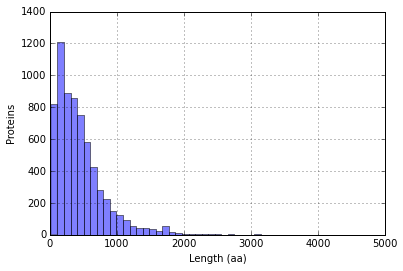

In [72]:
import matplotlib.pyplot as pl
p = prots['num aa'].plot(kind='hist', alpha=0.5, bins=50)
p.set_ylabel('Proteins')
x = p.set_xlabel('Length (aa)')

In [73]:
print prots['Reviewed'].value_counts()

Reviewed      6718
Unreviewed       3
dtype: int64


In [74]:
peps = pd.read_table('peptides.txt', converters={'ACs':eval})
peps

,peptide,ACs
0,MLTQK,[Q12200]
1,LFGWTAIFVAAAEGFTDIVK,[Q02979]
2,DILNEIDR,[P39077]
3,DGDDLVYEAEIDLLTAIAGGEFALEHVSGDWLK,[P25491]
4,SIETYLLTNK,[P33200]
5,HIPASVLK,[P06778]
6,LTDAEVDELLK,[P53141]
7,ILVTAIK,[Q05670]
8,DDAENTK,[Q12191]
9,HLDTDSSQQR,[P51533]


In [75]:
peps = peps.set_index('peptide')
peps

,ACs
peptide,
MLTQK,[Q12200]
LFGWTAIFVAAAEGFTDIVK,[Q02979]
DILNEIDR,[P39077]
DGDDLVYEAEIDLLTAIAGGEFALEHVSGDWLK,[P25491]
SIETYLLTNK,[P33200]
HIPASVLK,[P06778]
LTDAEVDELLK,[P53141]
ILVTAIK,[Q05670]
DDAENTK,[Q12191]


In [76]:
print peps.head()
print '---------------'
print peps.loc['MLTQK']['ACs']
print '---------------'
print peps.loc['LIK']['ACs']

                                        ACs
peptide                                    
MLTQK                              [Q12200]
LFGWTAIFVAAAEGFTDIVK               [Q02979]
DILNEIDR                           [P39077]
DGDDLVYEAEIDLLTAIAGGEFALEHVSGDWLK  [P25491]
SIETYLLTNK                         [P33200]
---------------
['Q12200']
---------------
['P30619', 'P40309', 'P38961', 'P42951', 'P36132', 'P36131', 'P32266', 'P52918', 'P43556', 'Q12080', 'P53965', 'P53172', 'P43610', 'P39520', 'P53886', 'P43577', 'P47139', 'Q08581', 'P53946', 'P53940', 'P38903', 'P38270', 'P38274', 'P38732', 'Q07830', 'P25847', 'Q12102', 'Q12109', 'Q06466', 'Q05881', 'Q12674', 'P38880', 'P38883', 'P36016', 'Q03124', 'P40505', 'Q04373', 'P39106', 'P53067', 'P0CX44', 'P52290', 'Q04311', 'P32874', 'P17442', 'P32461', 'P32602', 'P40090', 'P06700', 'Q99181', 'P26793', 'P26798', 'P50273', 'P50275', 'P53982', 'Q01532', 'P47054', 'P52910', 'P39985', 'P39678', 'Q06708', 'P38115', 'Q08032', 'P07149', 'P07149', 'P38300'

In [77]:
len(peps.loc['LIK']['ACs'])


165

In [78]:
ACcounts = peps['ACs'].apply(len)
ACcounts

peptide
MLTQK                                                                                       1
LFGWTAIFVAAAEGFTDIVK                                                                        1
DILNEIDR                                                                                    1
DGDDLVYEAEIDLLTAIAGGEFALEHVSGDWLK                                                           1
SIETYLLTNK                                                                                  1
HIPASVLK                                                                                    1
LTDAEVDELLK                                                                                 1
ILVTAIK                                                                                     1
DDAENTK                                                                                     1
HLDTDSSQQR                                                                                  1
YAADSVER                                            

In [79]:
peps['AC counts'] = ACcounts
peps

,ACs,AC counts
peptide,,
MLTQK,[Q12200],1
LFGWTAIFVAAAEGFTDIVK,[Q02979],1
DILNEIDR,[P39077],1
DGDDLVYEAEIDLLTAIAGGEFALEHVSGDWLK,[P25491],1
SIETYLLTNK,[P33200],1
HIPASVLK,[P06778],1
LTDAEVDELLK,[P53141],1
ILVTAIK,[Q05670],1
DDAENTK,[Q12191],1


In [80]:
peps['AC counts'].describe()

count    193224.000000
mean          1.792950
std          84.039458
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max       30303.000000
Name: AC counts, dtype: float64

In [81]:
peps['AC counts'].value_counts()

1        180468
2          6743
3          2002
4          1035
5           590
6           379
7           299
8           193
9           179
10          115
12          109
11           88
18           57
13           56
15           49
14           44
16           41
17           39
19           39
32           31
24           24
20           21
22           20
35           18
31           16
21           15
44           15
25           14
57           13
23           13
          ...  
123           1
83            1
78            1
19863         1
180           1
159           1
801           1
1572          1
166           1
1066          1
427           1
173           1
686           1
816           1
177           1
766           1
184           1
1228          1
187           1
188           1
191           1
193           1
66            1
322           1
1606          1
71            1
73            1
713           1
204           1
128           1
dtype: int64

In [82]:
groups = peps.groupby('AC counts')
groups.get_group(35)

,ACs,AC counts
peptide,,
YIR,"[P15180, P33550, Q07729, Q04002, P32567, Q0277...",35
WLK,"[Q03441, Q08548, P12754, Q07872, P46995, P3882...",35
NDR,"[P36096, Q06390, P40481, Q08448, Q07830, Q0166...",35
YYDR,"[P38960, Q99231, Q12088, Q12316, Q12337, O1353...",35
LLEK,"[P12753, P32897, P21147, P87272, P43570, P3827...",35
NVLSK,"[Q99231, Q12088, Q12141, Q12316, P34246, O1353...",35
MFR,"[P40302, P38821, P53769, Q12226, Q02775, Q1210...",35
ATR,"[Q08561, P52918, P40462, Q03419, P39529, Q0811...",35
VYR,"[P25356, P50875, P47112, P32353, P29295, Q0616...",35


In [83]:
peps_counts = peps[['AC counts']]
peps_counts.to_excel('peptides.xlsx')